In [31]:
import pandas as pd
from Bio import SeqIO, Seq

In [55]:
# Load "true" coverage
df_true = pd.read_csv("../testing_trueCount/genome1.cov", sep="\t", names=["contig", "pos","cov"])

In [51]:
df_true.head(5)

,contig,pos,cov
0,NC_014328.1,1,0
1,NC_014328.1,2,0
2,NC_014328.1,3,0
3,NC_014328.1,4,0
4,NC_014328.1,5,0


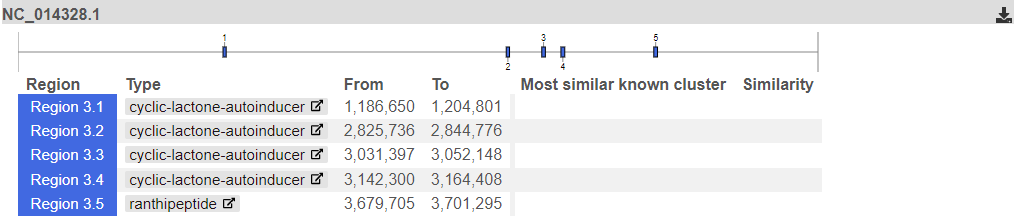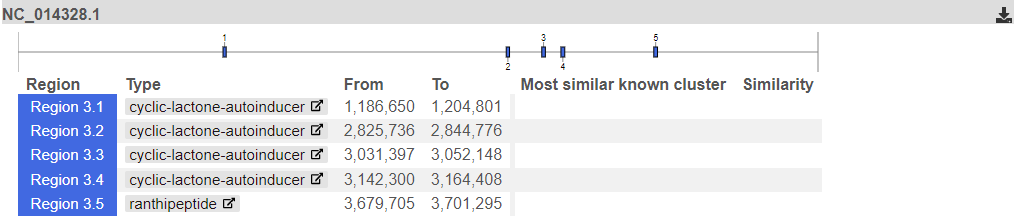

In [56]:
df_true[1186650:1204801].describe()

,pos,cov
count,1.815100e+04,18151.000000
mean,1.195726e+06,12.530880
std,5.239887e+03,3.809965
min,1.186651e+06,3.000000
25%,1.191188e+06,10.000000
50%,1.195726e+06,12.000000
75%,1.200264e+06,15.000000
max,1.204801e+06,26.000000


In [57]:
df_true.describe()

,pos,cov
count,4.630065e+06,4.630065e+06
mean,2.315033e+06,1.186248e+01
std,1.336585e+06,3.777545e+00
min,1.000000e+00,0.000000e+00
25%,1.157517e+06,9.000000e+00
50%,2.315033e+06,1.200000e+01
75%,3.472549e+06,1.400000e+01
max,4.630065e+06,3.300000e+01


In [53]:
1.016319e+01

10.16319

In [49]:
pd.read_csv("../testing_jelly/kat-sect-stats.tsv", sep="\t")

,seq_name,median,mean,gc%,seq_length,kmers_in_seq,invalid_kmers,%_invalid,non_zero_kmers,%_non_zero,%_non_zero_corrected
0,NC_014328.1.region004 ['cyclic-lactone-autoind...,6,7.02037,0.29712,22109,22089,0,0.0,22033,99.74648,99.74648
1,NZ_CP053893.1.region001 ['ranthipeptide'] NZ_C...,5,5.55638,0.29122,21561,21541,0,0.0,21396,99.32687,99.32687
2,NZ_LT906470.1.region001 ['betalactone'] NZ_LT9...,6,6.26375,0.40413,26333,26313,0,0.0,26273,99.84798,99.84798
3,NZ_CP053893.1.region004 ['cyclic-lactone-autoi...,6,6.55813,0.28421,19598,19578,0,0.0,19497,99.58627,99.58627
4,NZ_CP053893.1.region003 ['cyclic-lactone-autoi...,6,6.14273,0.28401,20394,20374,0,0.0,20302,99.64661,99.64661
5,NZ_CP053893.1.region002 ['cyclic-lactone-autoi...,7,27.65061,0.33288,19866,19846,0,0.0,19812,99.82868,99.82868
6,NZ_CP053893.1.region005 ['cyclic-lactone-autoi...,6,5.85124,0.29680,66040,66020,0,0.0,65874,99.77885,99.77885
7,NC_014328.1.region003 ['cyclic-lactone-autoind...,6,6.45230,0.27843,20752,20732,0,0.0,20668,99.69130,99.69130
8,NZ_CP053893.1.region006 ['cyclic-lactone-autoi...,6,7.16302,0.27278,20760,20740,0,0.0,20646,99.54677,99.54677
9,NC_014328.1.region001 ['cyclic-lactone-autoind...,6,6.49167,0.27380,18152,18132,0,0.0,18120,99.93382,99.93382


In [6]:
# "simulate" reads - first as fasta.

comb_fasta = SeqIO.parse(open("../testing_jelly/combined.fa","r"), "fasta")

In [11]:
next(comb_fasta).seq.__str__()

'TATATATTTTTATAAGTTTTTTTCGGATAGTTTAGAAAAGTTATCCACATTTTTTCTCTTTTGACCTGTGAATAGTATAAACTCAGTATTTATAAGGTTGGAAGGGAATTTTATTTTCTCTTATTCACAAGTTGTGCACAGGTTATTCACAGGCATTTGTGGTTTTTCCACAGTTTTAGAATAAGTTATGCACATAATAACGAAAGTTATACACATTTTTAGTAAAAGTTATACACAAGAGGAACAAAATGCAAGCAGCTGATATTAATGATATATGGGAACGTATATTACAAGTAGCAAAACAAACACTGCCGCCTGCGATTTATTCAAGTTTGAGTACTTCTCTCATACCGATGAGTATAGATAATAATTCTATACACATTGGGGTTATGCAGAGTTTTATAAAAAGTGTCATCGAATCTCAGCAAACGGTAAGTAAGTTGTTAACAGATGCCATCAAGCAAGTGACAGGCAAAGAATTAAATATGGTTTTATTGGATCTGTTTCCACAAAAGGATGATATTCCAACAGCACCGCAGGTAGCAGATACTTTCACAGAGAATACTGCAGAAAATACTAGTACGAACACTATAGAAAATACGGTGGTAAGTGACGCGGACAACATCGATAAAAAATCCTCAAAACCTGCAAAGCAGGAGGTTCCATATCAAGAGGAATTTTACACACCGGTGTACGCAGATCCTGTGTATATCCAGCGTAAAGAGGTGGACGAGTTAATTCCAGATGAACCGATGTTTCCTGTAGAGCAGCCACAAATGGTGCAAACGTTGCAATCTACGGATATTCCTATCGATTTGTCATCGTCACAGCTAAACAGTGGTTATCGATTTGATAATTACATTACAGGCAATGCGAACCGCATTCCGTTTGGAGCAGCCCAAAATGTGTCGGAGCATCCTGGCGGCGATTATAATCCGCTTTTTATCTACGGTCCATCGGGCCTCGGTAAAACGCATTTGATGCACGCCATCGGCAATG

In [48]:
reads_file = "../testing_jelly/readish.fa"
n=90
with open(reads_file, "w") as fh:
    for rec in SeqIO.parse(open("../testing_jelly/combined.fa","r"), "fasta"):
        seq = rec.seq.__str__()
        chunks = [seq[i:i+n] for i in range(0, len(seq), n)]
        entries = [f">read{i}\n"+ seq if (i % 2 == 0) else f">read{i}\n"+Seq.Seq(seq).reverse_complement().__str__() for i,seq in enumerate(chunks)]
        fh.write("\n".join(entries))
    

In [43]:
4 % 2 == 0

True

In [39]:
Seq.Seq("ATGCAAAGTTTTATAAAAAACTTGATTGATCAGCAGCCCGTCATCAGTAATGCATTACAAAATGCGATTACCACCGTGCTCGGATCCCAT").reverse_complement().__str__()

'ATGGGATCCGAGCACGGTGGTAATCGCATTTTGTAATGCATTACTGATGACGGGCTGCTGATCAATCAAGTTTTTTATAAAACTTTGCAT'

In [38]:
c

'ATGGGATCCGAGCACGGTGGTAATCGCATTTTGTAATGCATTACTGATGACGGGCTGCTGATCAATCAAGTTTTTTATAAAACTTTGCAT'

In [27]:
df_count = pd.read_csv("../data/simulated_data/quantification_kmer/0_2GB/counts/NC_014328.1.region001.counted", sep=" ", names=["mer","mercount"])

In [20]:
import plotly.express as px

In [28]:
px.histogram(df_count, "mercount")

In [25]:
k = 18
df_count["rolling_cov"] = [sum(df_count["mercount"].values[max(i-k+1,0):i+1])/k for i in range(len(df_count))]

In [26]:
px.histogram(df_count, "rolling_cov")